In [2]:
import cv2

In [28]:
modelFile = "/home/spydy/joker/models/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb"
configFile = "/home/spydy/joker/models/ssd_mobilenet_v2_coco_2018_03_29/ssd_mobilenet_v2_coco_2018_03_29.pbtxt"
classFile = "ssd_mobilenet_v2_coco_2018_03_29/coco-labels-paper.txt"

**Read TensorflowModel**

In [37]:
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)


**Detect Objects**

In [38]:
# For ach file in the directory
def detect_objects (net, im):
   dim = 300

   # Create a blob from the image
   blob = cv2.dnn.blobFromImage(im, 1.0, size= (dim, dim), mean=(0,0,0), swapRB=True , crop=False)
   
   # Pass blob to the network
   net.setInput (blob)

   # Peform Prediction
   objects = net. forward()
   return objects


**Display Text**

In [39]:
def display_text(im, text, x, y):
    # Get text size
    textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]

    # Use text size to create a black rectangle
    cv2.rectangle(im, (x,y-dim[1]- baseline), (x + dim[0], y + baseline), (0,0,0), cv2.FILLED);

    # Display text inside the rectangle
    cv2.putText(im, text, (x, y-5 ), FONTFACE, FONT_SCALE, (0, 255, 255), THICKNESS, cv2.LINE_AA)


**Display Objects**

In [43]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.7
THICKNESS = 1

def display_objects (im, objects, threshold = 0.25):

    rows = im. shape[0]; cols = im.shape[1]

     # For every Detected object
    for i in range (objects.shape[2]):
        # Find the class and confidence
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])

        # Recover original cordinates from normalized coordinates
        x = int (objects[0, 0, i, 3] * cols)
        y = int (objects[0, 0, i, 4] * rows)
        w = int(objects[0, 0, i, 5] * cols - x)
        h = int(objects[0, 0, i, 6] * rows - y)

        # Check if the detection is of good quality
        if score > threshold:
            display_text(im,"{}".format(classId), x, y)
            cv2.rectangle(im, (x,y),(x+w,y+h), (255,255,255), 2)

        # Convert Image to RGB since we are using Matplotlib for displaying image
    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(30,10)); plt. imshow(mp_img); plt.show();


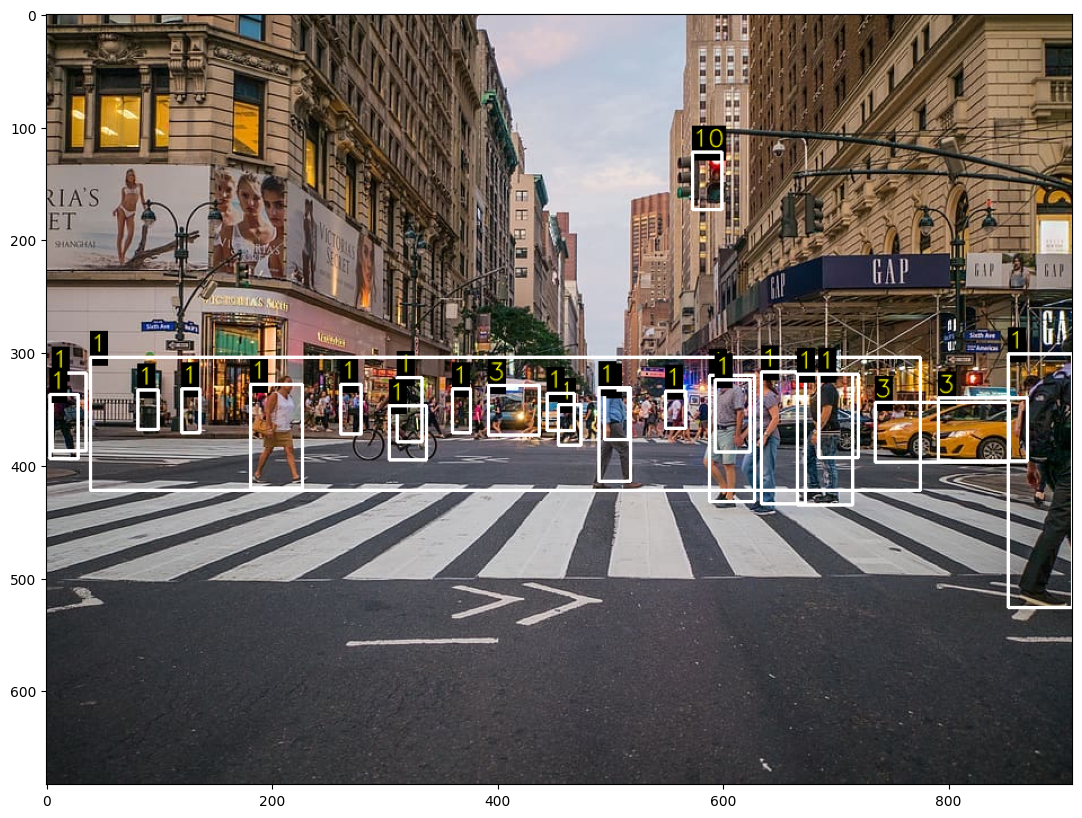

In [44]:
im = cv2.imread('/home/spydy/Downloads/crowd.jpeg')
objects = detect_objects(net, im)
display_objects(im, objects)